### Import Package

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1. Draw Function

In [2]:
def plot_decision_regions(X, y, classifier, title):
    resolution=0.01
    markers = ('s', '^', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

### 2. Get Iris Datas
- Depth1
- Depth2
- Depth3
- Predict

In [3]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

##### Depth 1

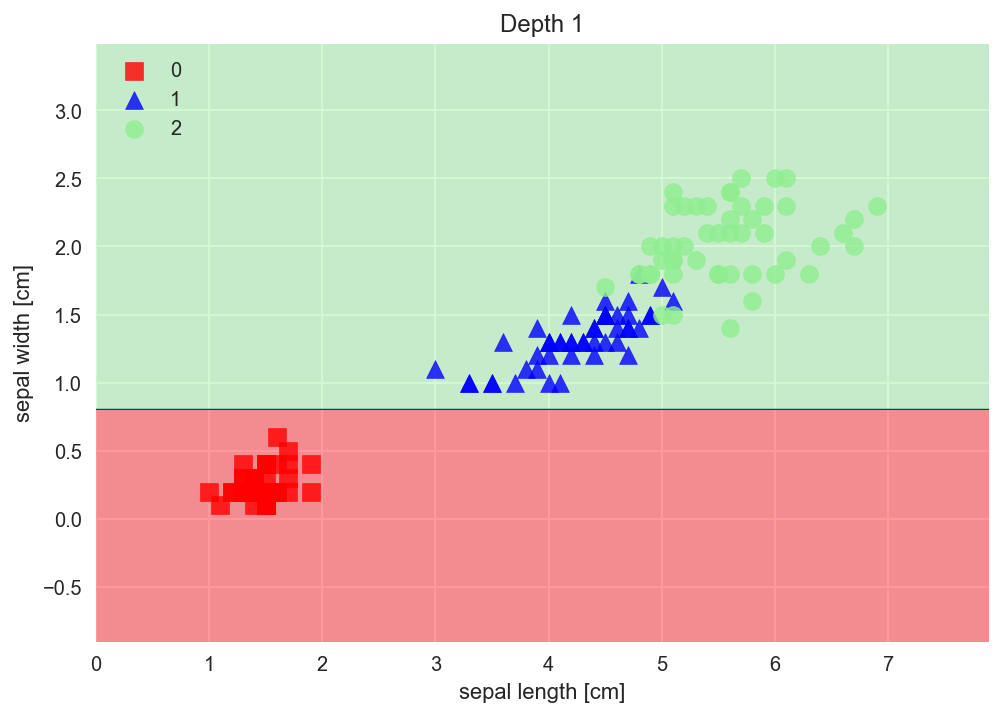

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [4]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)
plot_decision_regions(X, y, tree1, "Depth 1")
confusion_matrix(y, tree1.predict(X))

##### Depth 2

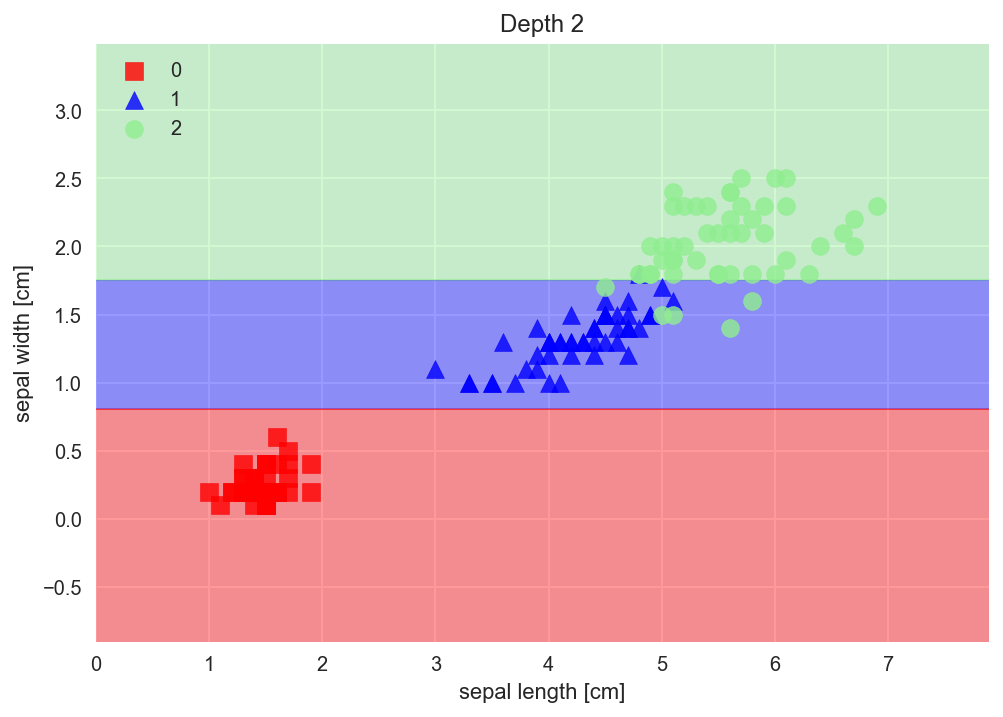

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [5]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
plot_decision_regions(X, y, tree2, "Depth 2")
confusion_matrix(y, tree2.predict(X))

##### Depth 3

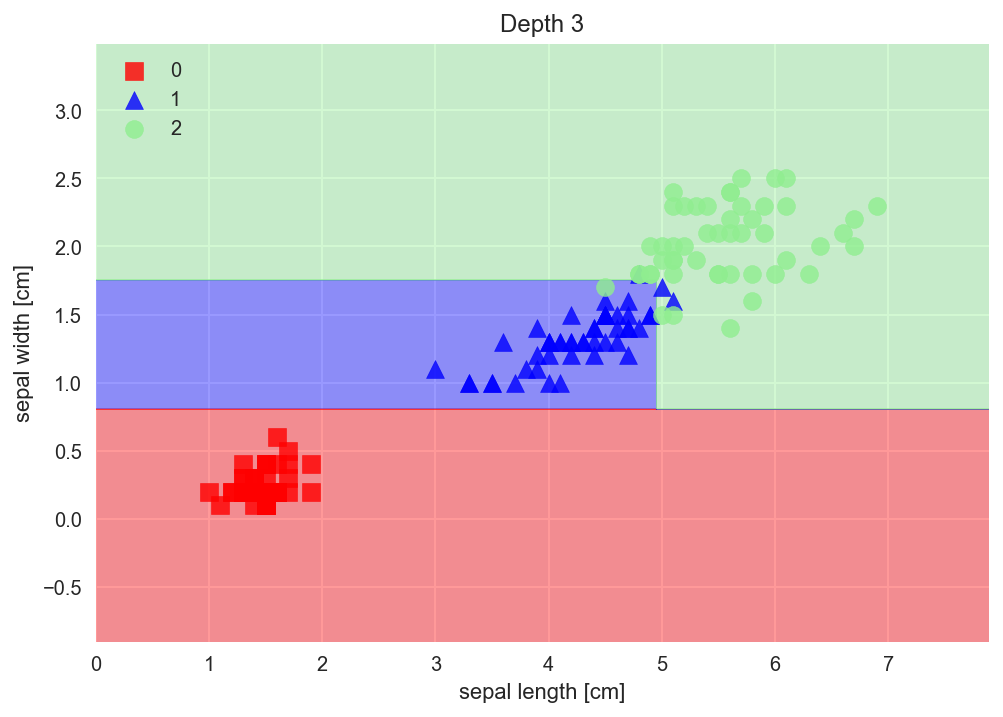

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [6]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
plot_decision_regions(X, y, tree3, "Depth 3")
confusion_matrix(y, tree3.predict(X))

##### Predict

In [7]:
tmp_data1 = np.array([5, 1]).reshape(1, -1)
p1 = tree3.predict(tmp_data1)

tmp_data2 = np.array([3, 1]).reshape(1, -1)
p2 = tree3.predict(tmp_data2)

p1, p2

(array([2]), array([1]))